In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

gapminder_df = pd.read_csv('gapminder.tsv', sep='\t') #Read the dataset
gapminder_df.head() #Display first few rows

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [ ]:
recent_year = gapminder_df['year'].max() #Get the most recent year
recent_year_df = gapminder_df[gapminder_df['year'] == recent_year] #Filter thedataframe based on the most recent year
recent_year_df.shape #Shape of the new dataframe

(142, 6)

In [ ]:
recent_year_df['gdpPercap'].describe()

count      142.000000
mean     11680.071820
std      12859.937337
min        277.551859
25%       1624.842248
50%       6124.371108
75%      18008.835640
max      49357.190170
Name: gdpPercap, dtype: float64

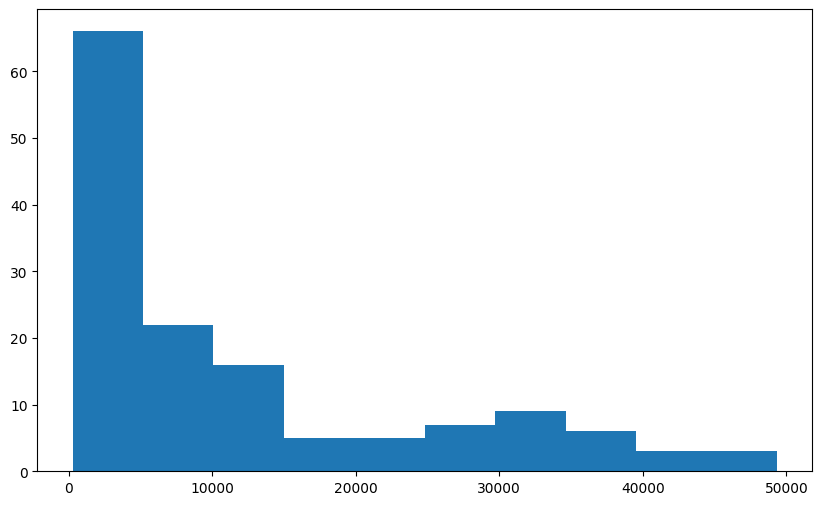

In [ ]:
plt.figure(figsize=(10, 6)) #Create a figure
plt.hist(recent_year_df['gdpPercap']); #Plot the histogram

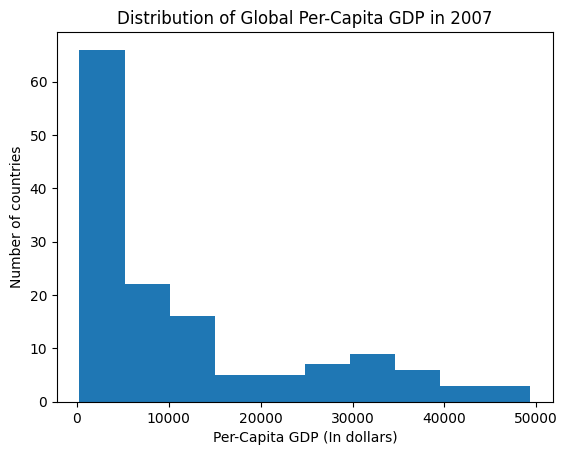

In [ ]:
plt.hist(recent_year_df['gdpPercap'])
plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (In dollars)')
plt.ylabel('Number of countries');

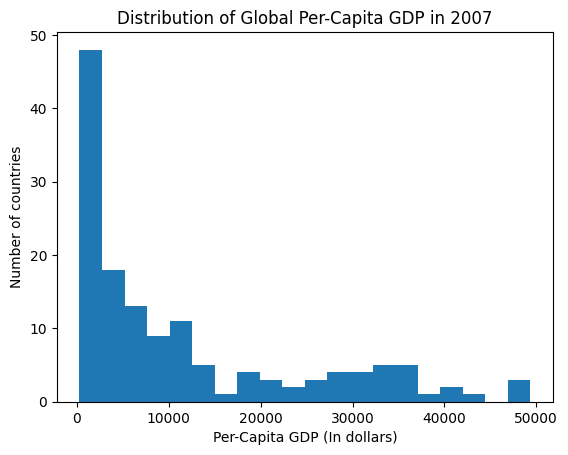

In [ ]:
plt.hist(recent_year_df['gdpPercap'], bins=20)
plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (In dollars)')
plt.ylabel('Number of countries');

# more bins you specify, the more narrow the bins will be.
# precision
# If you have too many bins, then the data distribution will look rough, and it will be difficult to discern the signal from the noise. On the other hand, with too few bins, the histogram will lack the details needed to discern any useful pattern from the data.

In [ ]:
countries_df = gapminder_df[['country', 'continent']] #New dataframe with selected features
countries_df = countries_df.drop_duplicates() #Drop duplicate combinations
countries_df.shape

(142, 2)

In [ ]:
country_counts_df = countries_df.groupby('continent', as_index=False).agg('count')
country_counts_df.head()

,continent,country
0,Africa,52
1,Americas,25
2,Asia,33
3,Europe,30
4,Oceania,2


range(0, 5)
0      Africa
1    Americas
2        Asia
3      Europe
4     Oceania
Name: continent, dtype: object


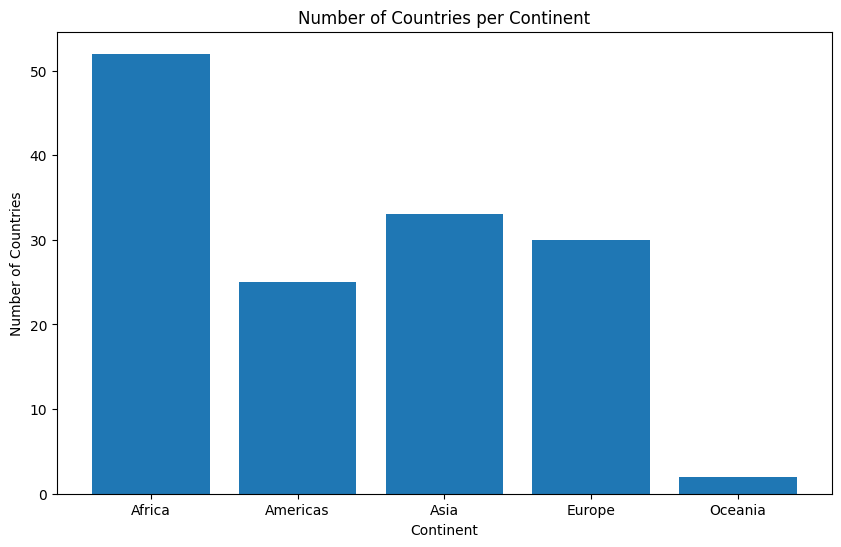

In [ ]:
no_continents = len(country_counts_df)
x = range(no_continents)
print(x)
y = country_counts_df['country']
continents = country_counts_df['continent']
print(continents)


plt.figure(figsize=(10, 6))
plt.bar(x, y) #Plot bar graph
plt.xlabel('Continent')
plt.ylabel('Number of Countries');
plt.title('Number of Countries per Continent')
plt.xticks(x, continents);




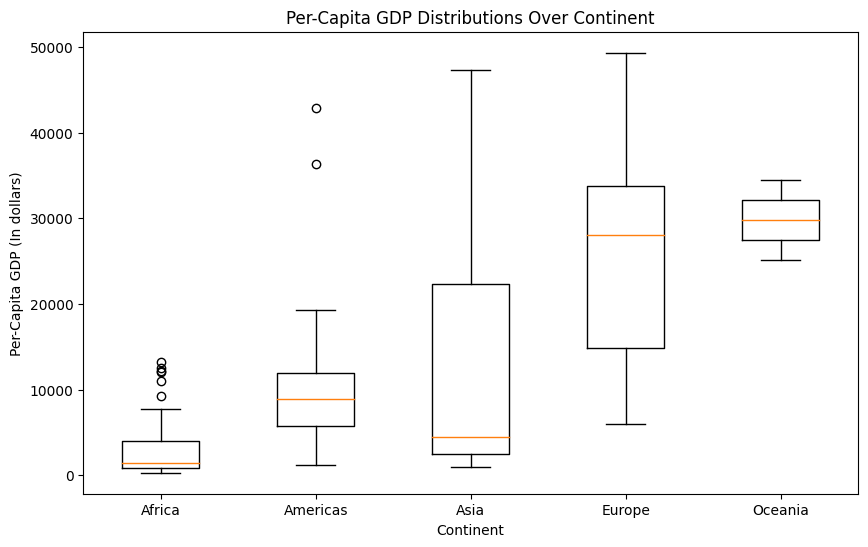

In [ ]:
continent_gdp_recent = []
for c in continents:
  cur_cont = recent_year_df[recent_year_df['continent'] == c] #New dataframe for current continent
  cur_gdp_vals = cur_cont['gdpPercap'].values #Store Per-capita GDP values of current continent in an array
  continent_gdp_recent.append(cur_gdp_vals) #Append values to the list



plt.figure(figsize=(10, 6))
plt.boxplot(continent_gdp_recent)
plt.title('Per-Capita GDP Distributions Over Continent')
plt.xlabel('Continent')
plt.ylabel('Per-Capita GDP (In dollars)')
plt.xticks(range(1, len(continents) + 1), continents);


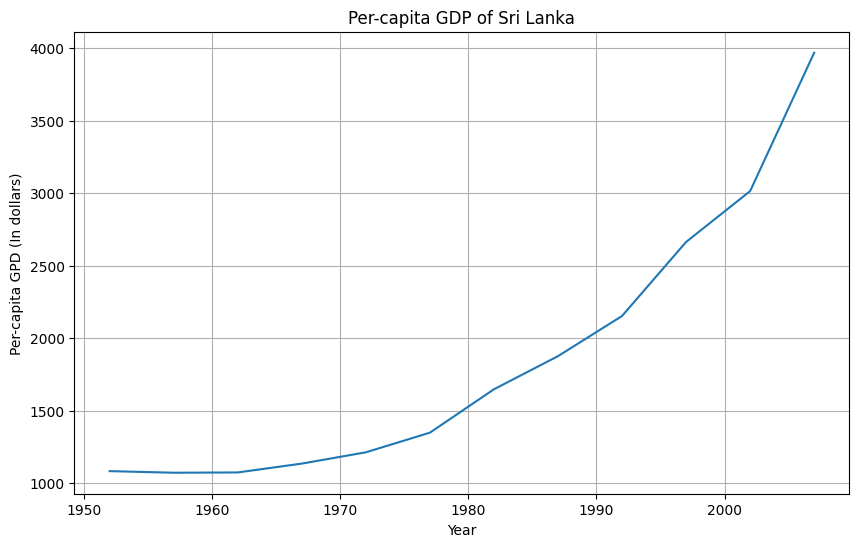

In [ ]:
lk = gapminder_df[gapminder_df['country'] == 'Sri Lanka']
plt.figure(figsize=(10, 6))
plt.plot(lk['year'], lk['gdpPercap'])
plt.title('Per-capita GDP of Sri Lanka')
plt.xlabel('Year')
plt.ylabel('Per-capita GPD (In dollars)')
plt.grid();

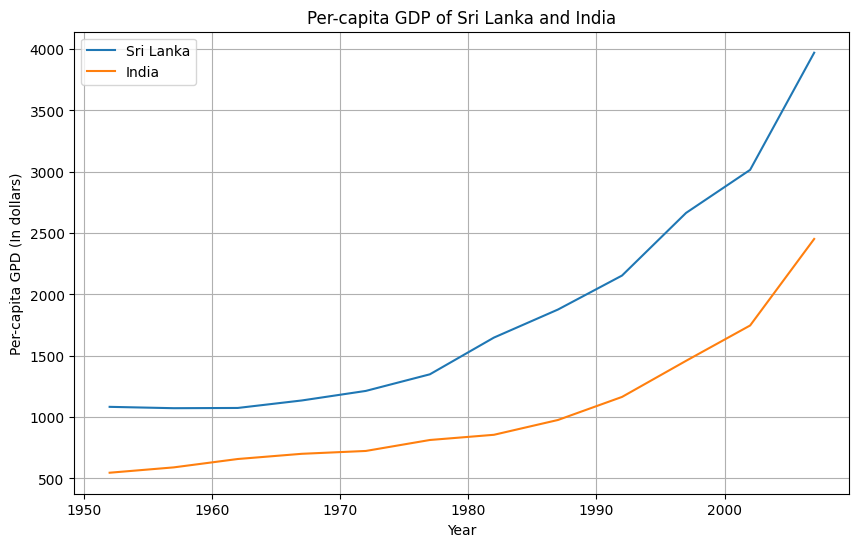

In [ ]:
lk = gapminder_df[gapminder_df['country'] == 'Sri Lanka']
In = gapminder_df[gapminder_df['country'] == 'India']

plt.figure(figsize=(10, 6))

#plot both in same graph
plt.plot(lk['year'], lk['gdpPercap'], label='Sri Lanka')
plt.plot(In['year'], In['gdpPercap'], label='India')
plt.title('Per-capita GDP of Sri Lanka and India')
plt.xlabel('Year')
plt.ylabel('Per-capita GPD (In dollars)')
plt.legend()
plt.grid();

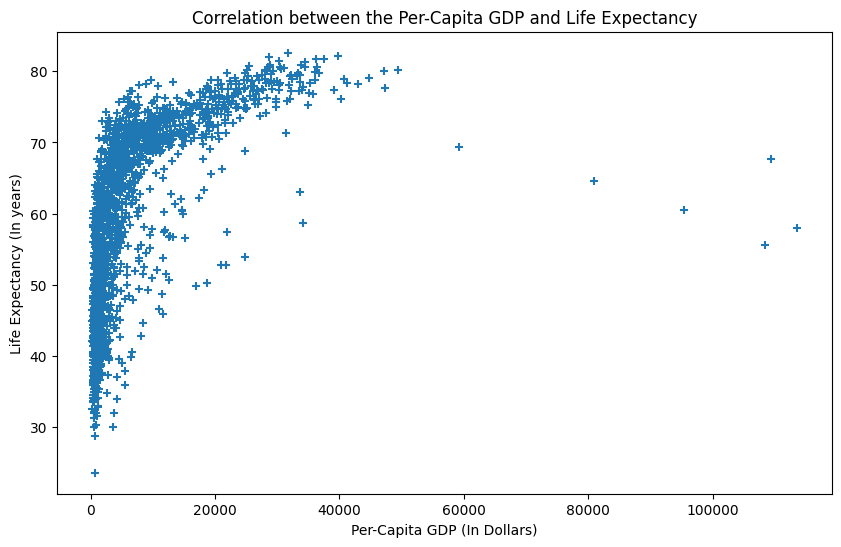

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(gapminder_df['gdpPercap'], gapminder_df['lifeExp'], marker='+')
plt.title('Correlation between the Per-Capita GDP and Life Expectancy')
plt.xlabel('Per-Capita GDP (In Dollars)')
plt.ylabel('Life Expectancy (In years)');

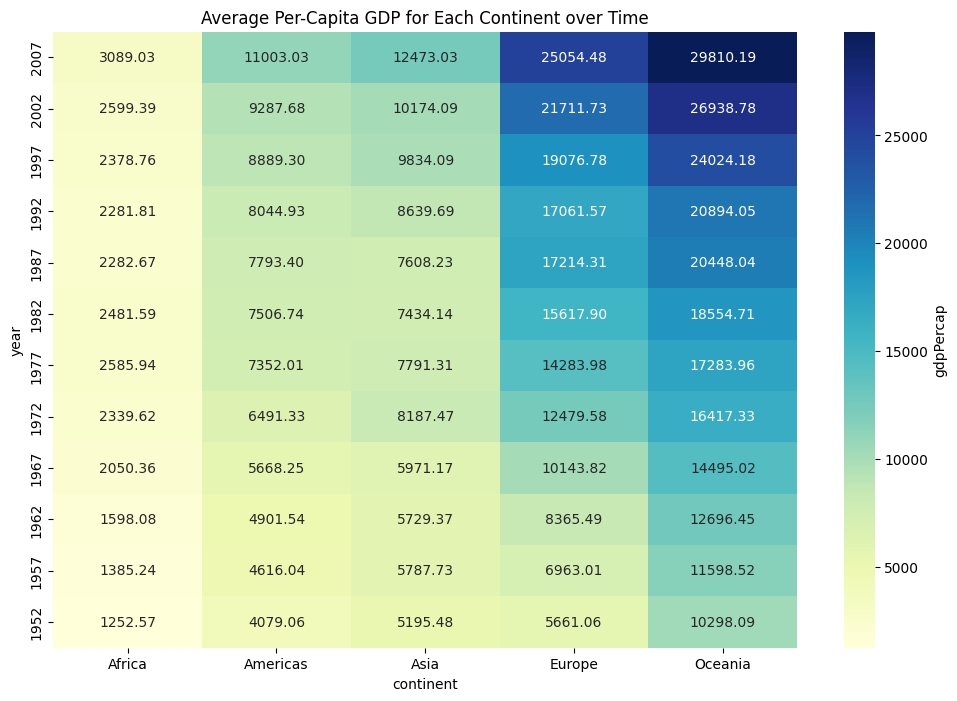

In [ ]:
per_continent_mean_gdp_df = gapminder_df.groupby(['continent', 'year'],as_index=False)['gdpPercap'].mean()
plt.figure(figsize=(12, 8))
heatmap = per_continent_mean_gdp_df.pivot(index="year", columns="continent", values="gdpPercap")
heatmap = heatmap.sort_index(ascending=False)
heatmap_graph = sns.heatmap(heatmap, annot=True, fmt=".2f", cmap='YlGnBu', cbar_kws={'label': "gdpPercap"})
plt.title("Average Per-Capita GDP for Each Continent over Time");

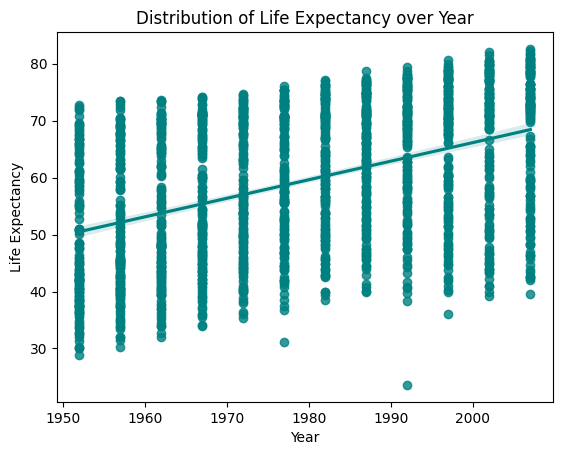

In [ ]:
sns.regplot(x='year', y='lifeExp', data=gapminder_df, color='teal')
plt.title('Distribution of Life Expectancy over Year')
plt.xlabel('Year')
plt.ylabel('Life Expectancy');


<ipython-input-16-0a57579aa635>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(recent_year_df['gdpPercap'], shade=True)


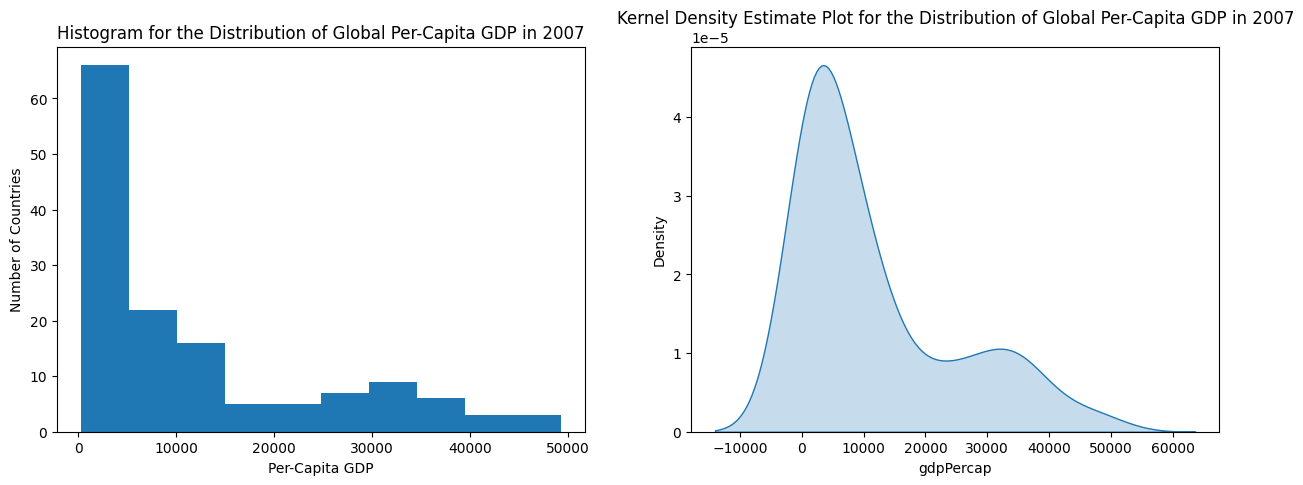

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(recent_year_df['gdpPercap'])
plt.xlabel('Per-Capita GDP')
plt.ylabel("Number of Countries")
plt.title('Histogram for the Distribution of Global Per-Capita GDP in 2007')
plt.subplot(1, 2, 2)
sns.kdeplot(recent_year_df['gdpPercap'], shade=True)
plt.title('Kernel Density Estimate Plot for the Distribution of Global Per-Capita GDP in 2007');


In [ ]:
plt.savefig('plot.png', dpi=400, bbox_inches ='tight')

<Figure size 640x480 with 0 Axes>

In [ ]:
winequality_red_df = pd.read_csv('winequality_red.csv', sep=',') #Read the dataset
winequality_red_df.head() #Display first few rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
winequality_red_df.isna().sum()

fixed acidity            0
volatile acidity        14
citric acid              0
residual sugar          12
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       5
sulphates                0
alcohol                  0
quality                  0
dtype: int64

In [ ]:
# Romove rows which contains missing values
withoutmissing_values_df = winequality_red_df.dropna()
withoutmissing_values_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

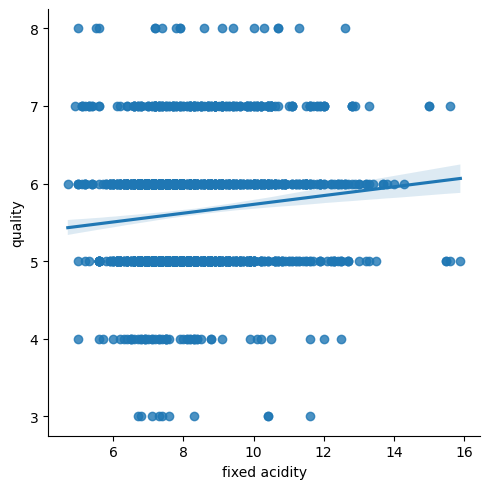

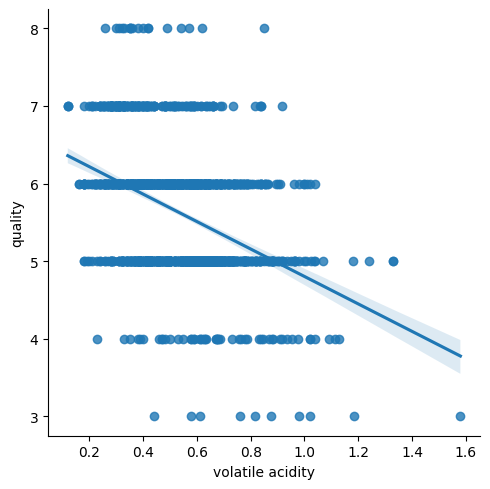

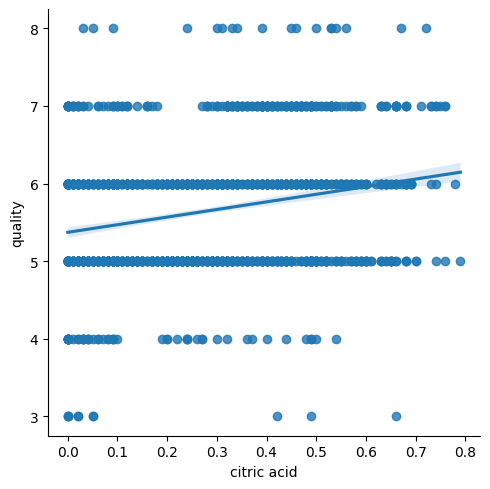

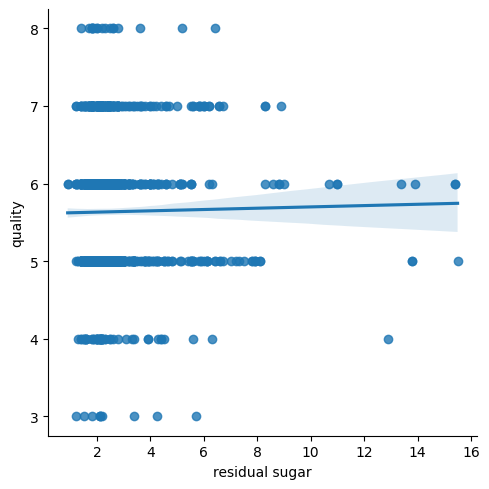

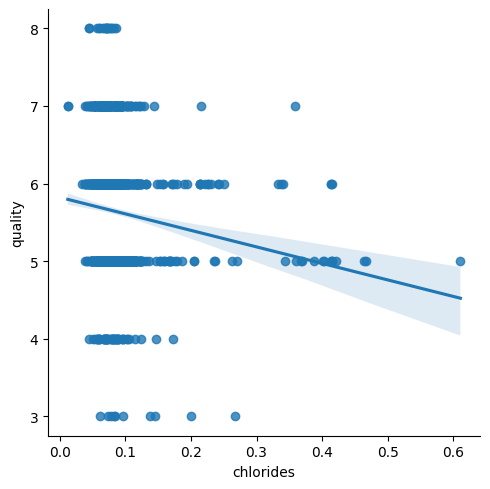

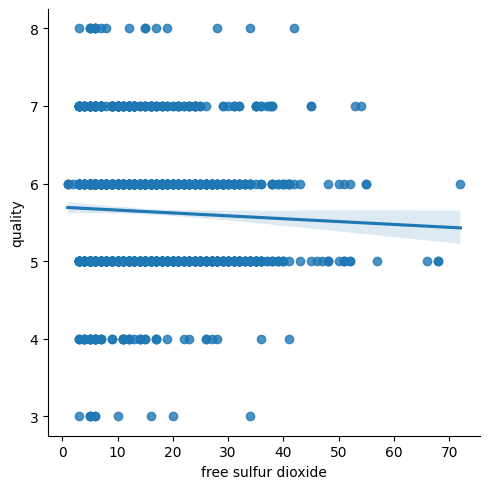

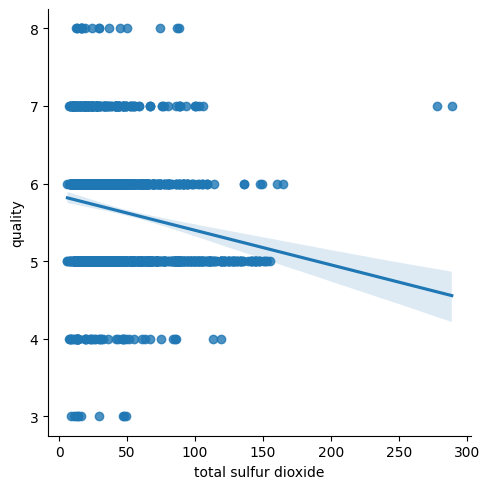

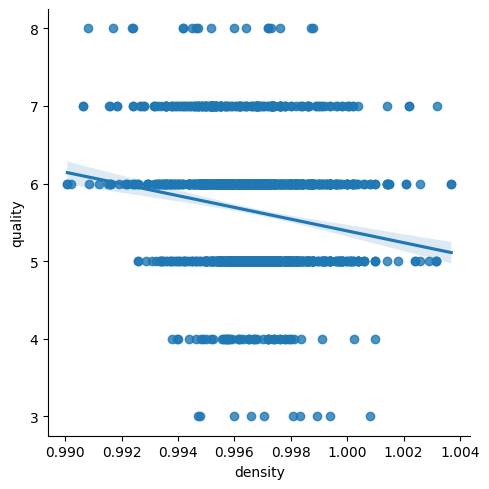

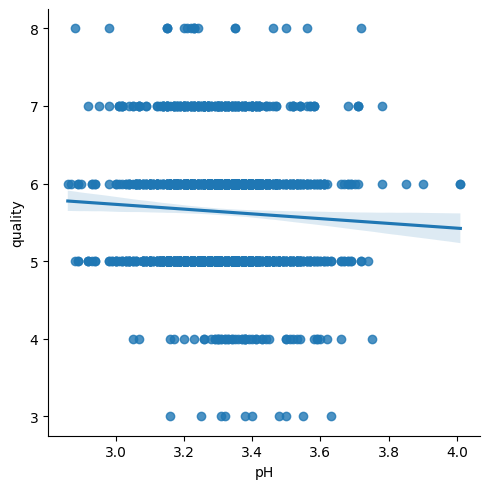

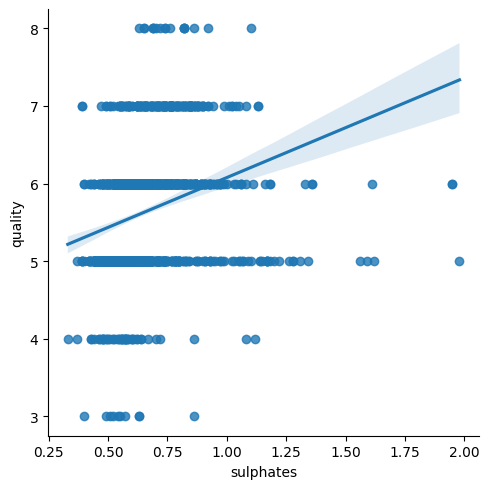

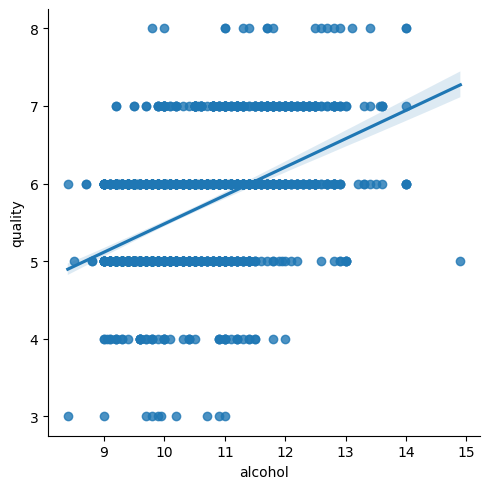

In [ ]:
# plot each attribute
for var in withoutmissing_values_df.columns:
  if var == 'quality':
    continue
  sns.lmplot(x=var, y="quality", data=withoutmissing_values_df)




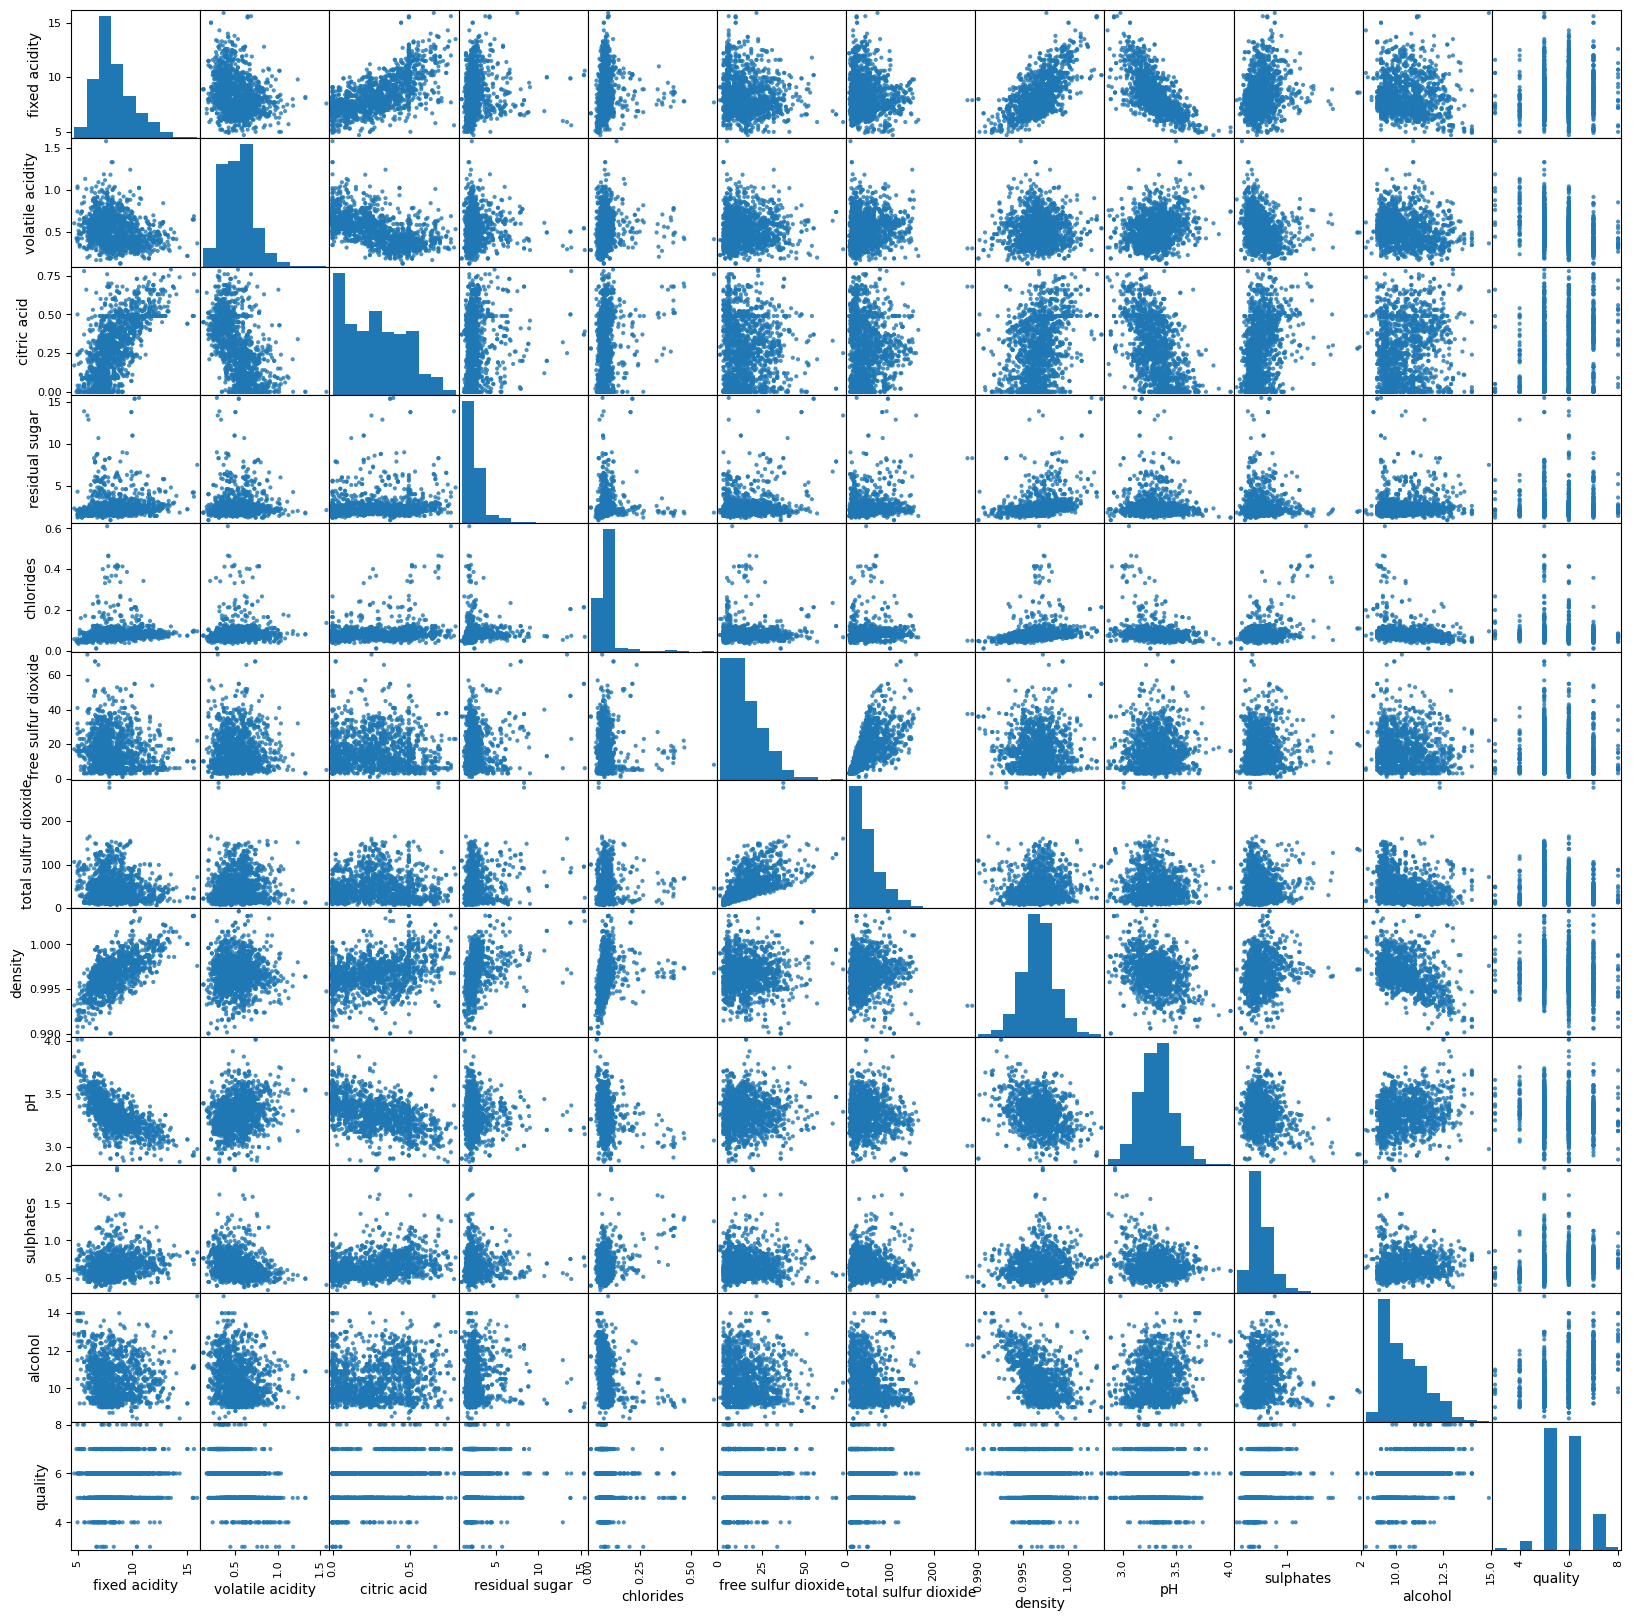

In [ ]:
pd.plotting.scatter_matrix(withoutmissing_values_df, alpha=0.8, figsize=(20, 20), diagonal='hist')
plt.savefig('TODO3_5.png', dpi=400, bbox_inches ='tight')
plt.show()

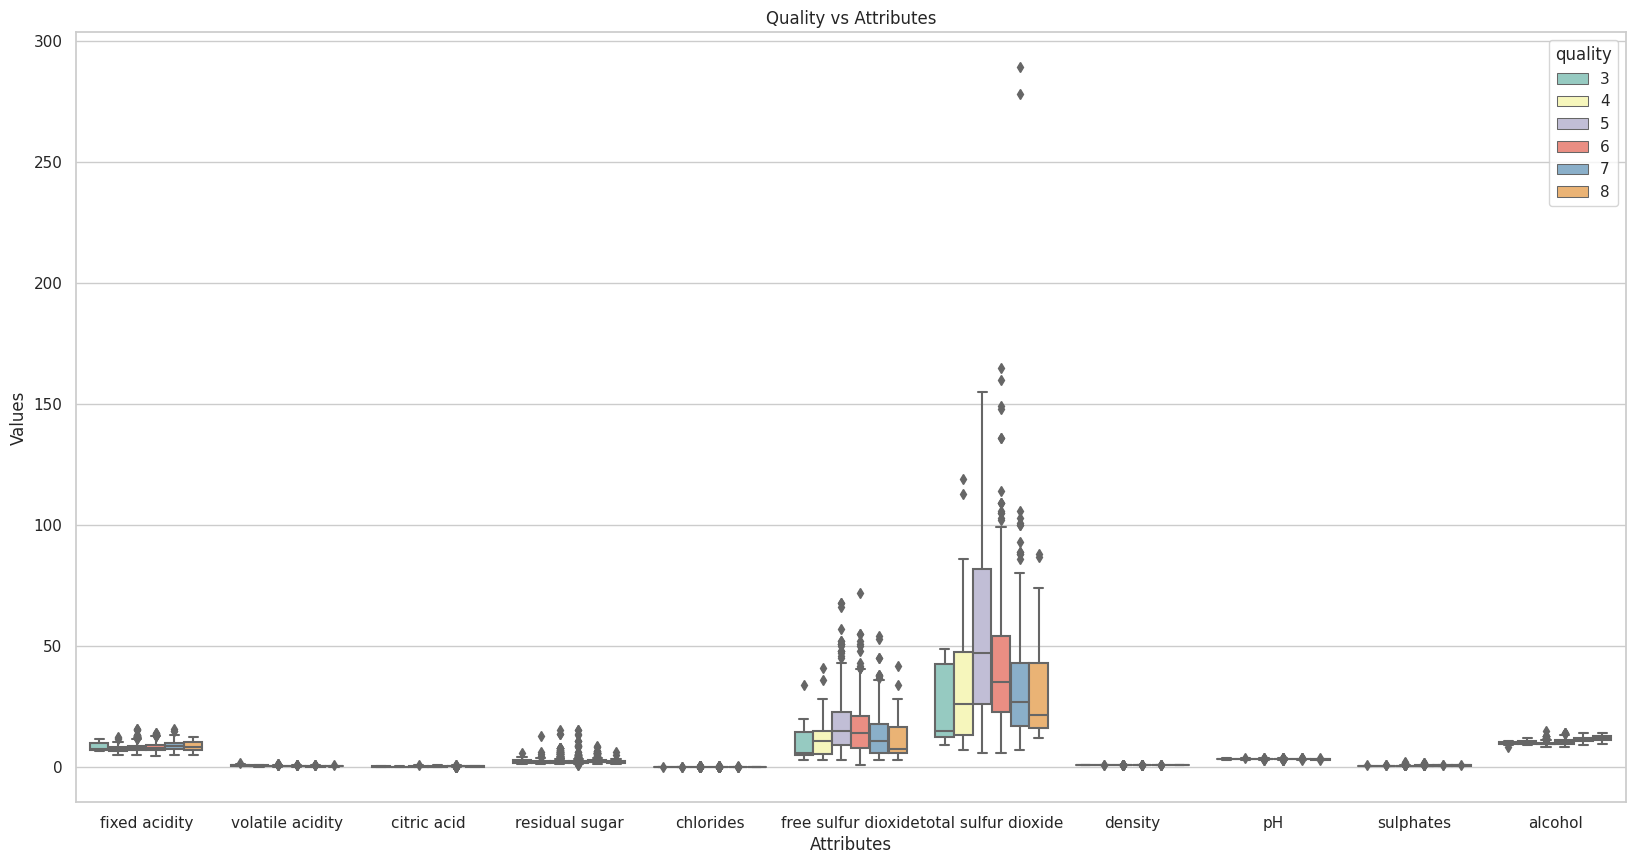

In [ ]:
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")

#convert it to long format
df = pd.melt(withoutmissing_values_df, id_vars=['quality'], var_name='chlorides', value_name='Value')

sns.boxplot(x='chlorides', y='Value', hue='quality', data=df, palette='Set3')
plt.title('Quality vs Attributes')
plt.xlabel('Attributes')
plt.ylabel('Values')
plt.savefig('TODO3_6.png', dpi=400, bbox_inches ='tight')
plt.show()

In [ ]:
# standardizing
standardized_df = withoutmissing_values_df.copy()
for var in variables:
  standardized_df[var] = ((withoutmissing_values_df[var] - withoutmissing_values_df[var].mean()) / withoutmissing_values_df[var].std()).round(2)
standardized_df.head()

NameError: ignored

In [ ]:
# normalizing
normalized_and_standardized_df = standardized_df.copy()
for var in variables:
  normalized_and_standardized_df[var] = ((standardized_df[var] - standardized_df[var].min()) / (standardized_df[var].max() - standardized_df[var].min())).round(2)
normalized_and_standardized_df.head()

In [ ]:
# compare all
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(withoutmissing_values_df['fixed acidity'])
plt.title('Original data')

plt.subplot(1, 3, 2)
plt.hist(standardized_df['fixed acidity'])
plt.title('standardization')

plt.subplot(1, 3, 3)
plt.hist(normalized_and_standardized_df['fixed acidity'])
plt.title('Normalization');

In [ ]:
withoutmissing_values_df['fixed acidity'].describe()

In [ ]:
standardized_df['fixed acidity'].describe()

In [ ]:
normalized_and_standardized_df['fixed acidity'].describe()

In [ ]:
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
#convert it to long format
df = pd.melt(normalized_and_standardized_df, id_vars=['quality'], var_name='chlorides', value_name='Value')

sns.boxplot(x='chlorides', y='Value', hue='quality', data=df, palette='Set3')

plt.title('Quality vs Attributes')
plt.xlabel('Attributes')
plt.ylabel('Values')

plt.savefig('TODO3_8.png', dpi=400, bbox_inches ='tight')
plt.show()

In [ ]:
import pandas_profiling as pp

# Generate report
report = pp.ProfileReport(withoutmissing_values_df)

# Save report as HTML file
report.to_file('finalReport_E18022.html')